In [ ]:
# Installing necessary libraries
!pip install torch
!pip install mplfinance

In [ ]:
# importing all required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mplfinance as mpf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Question 1

### Function to plot minute by minute closing prices of a stock

In [ ]:
def plot_min_by_min_closing_prices(file):
    # Read the text file into a DataFrame
    fileLoc = "/content/drive/MyDrive/EE782/Assign1/sp500_tickers_A-D_1min_1pppix/" + file
    df = pd.read_csv(fileLoc, header=None, names=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], parse_dates=['Date'])

    # Set the Timestamp column as the index
    df.set_index('Date', inplace=True)

    # Plot minute-by-minute closing prices
    plt.figure(figsize=(18, 9))
    plt.plot(df.index, df['Close'], label='Closing Price')
    plt.title('Minute-by-Minute Closing Prices')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.legend()
    plt.show()


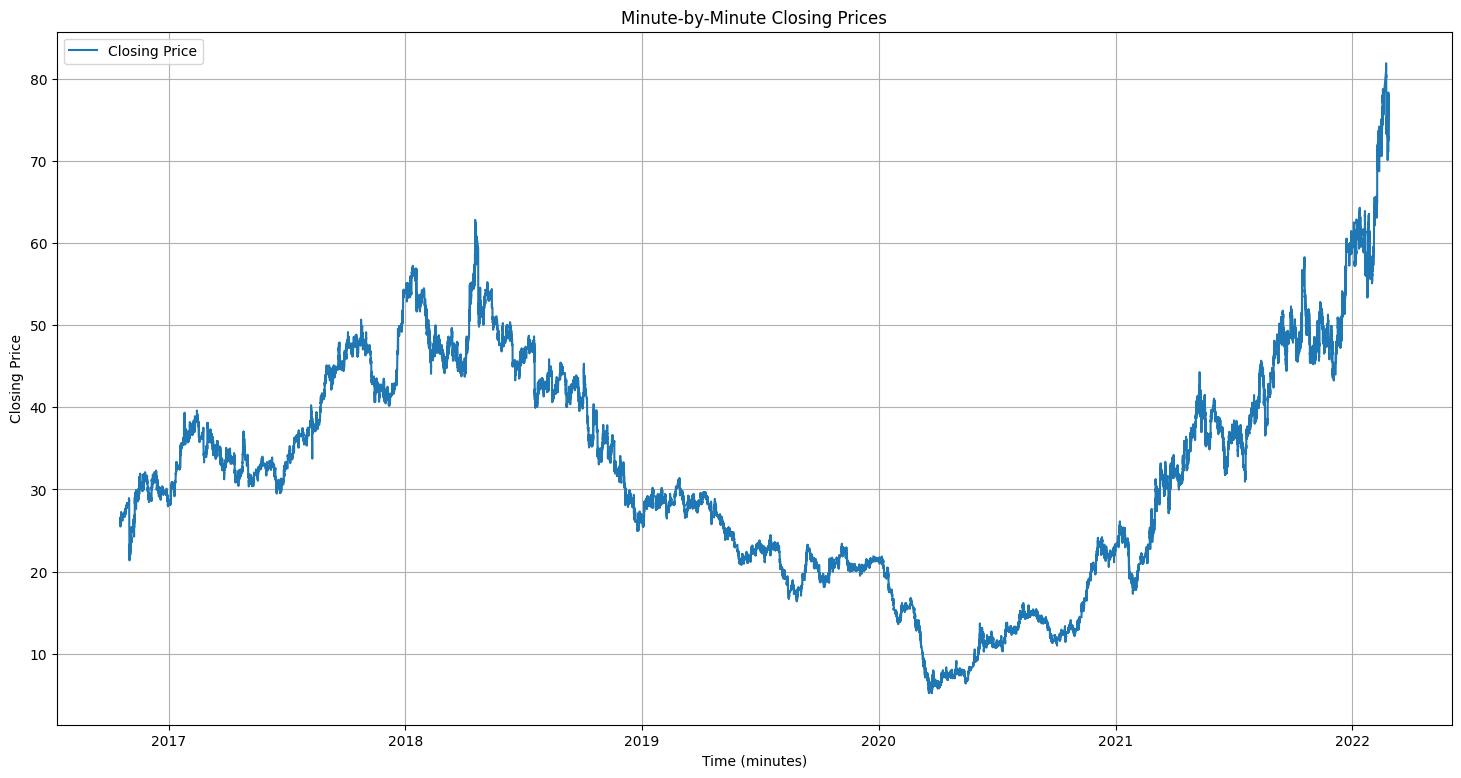

In [ ]:

file = 'AA_1min.txt'
plot_min_by_min_closing_prices(file)

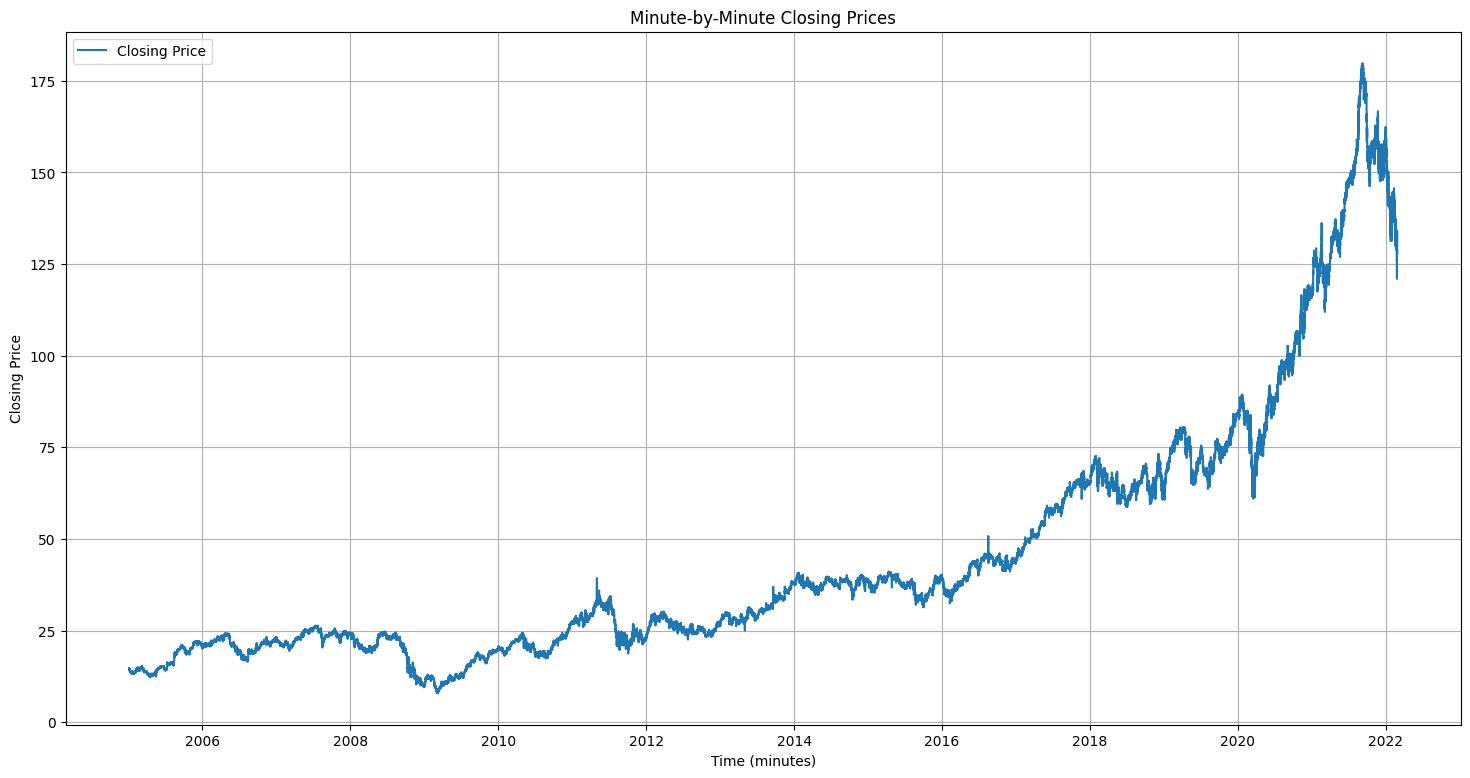

In [ ]:
file = 'A_1min.txt'
plot_min_by_min_closing_prices(file)

### Function to plot minute by minute closing prices of a stock

In [ ]:
def plot_day_by_day_closing_prices(file):
    # Read the text file into a DataFrame
    fileLoc = "/content/drive/MyDrive/EE782/Assign1/sp500_tickers_A-D_1min_1pppix/" + file
    df = pd.read_csv(fileLoc, header=None, names=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], parse_dates=['Date'])

    # Set the Timestamp column as the index
    df.set_index('Date', inplace=True)

    # Resample the data to daily frequency and calculate the daily closing price
    daily_close = df['Close'].resample('D').last()

    # Plot day-by-day closing prices
    plt.figure(figsize=(18, 9))
    plt.plot(daily_close.index, daily_close.values, label='Closing Price')
    plt.title('Day-by-Day Closing Prices')
    plt.xlabel('Time (days)')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.legend()
    plt.show()

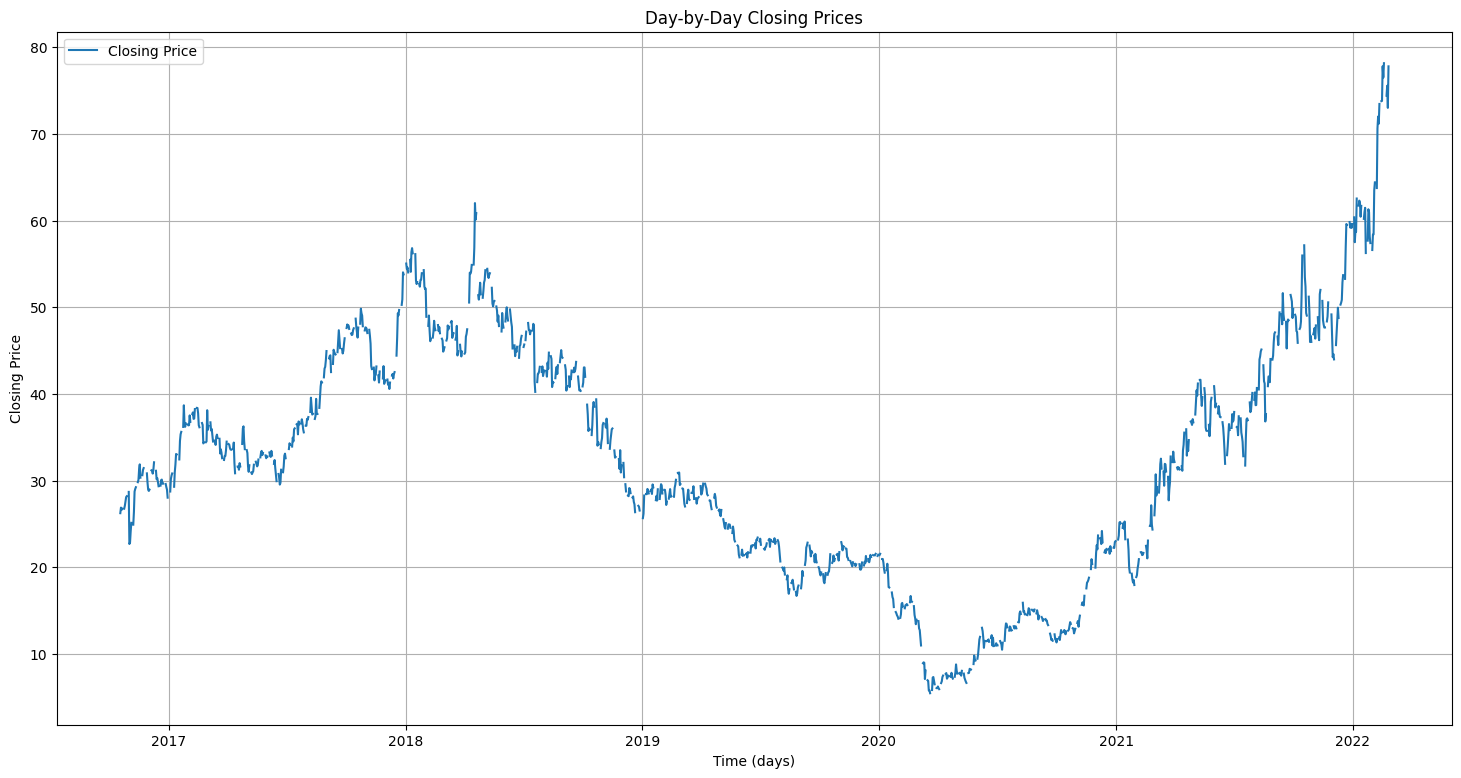

In [ ]:
file = 'AA_1min.txt'
plot_day_by_day_closing_prices(file)

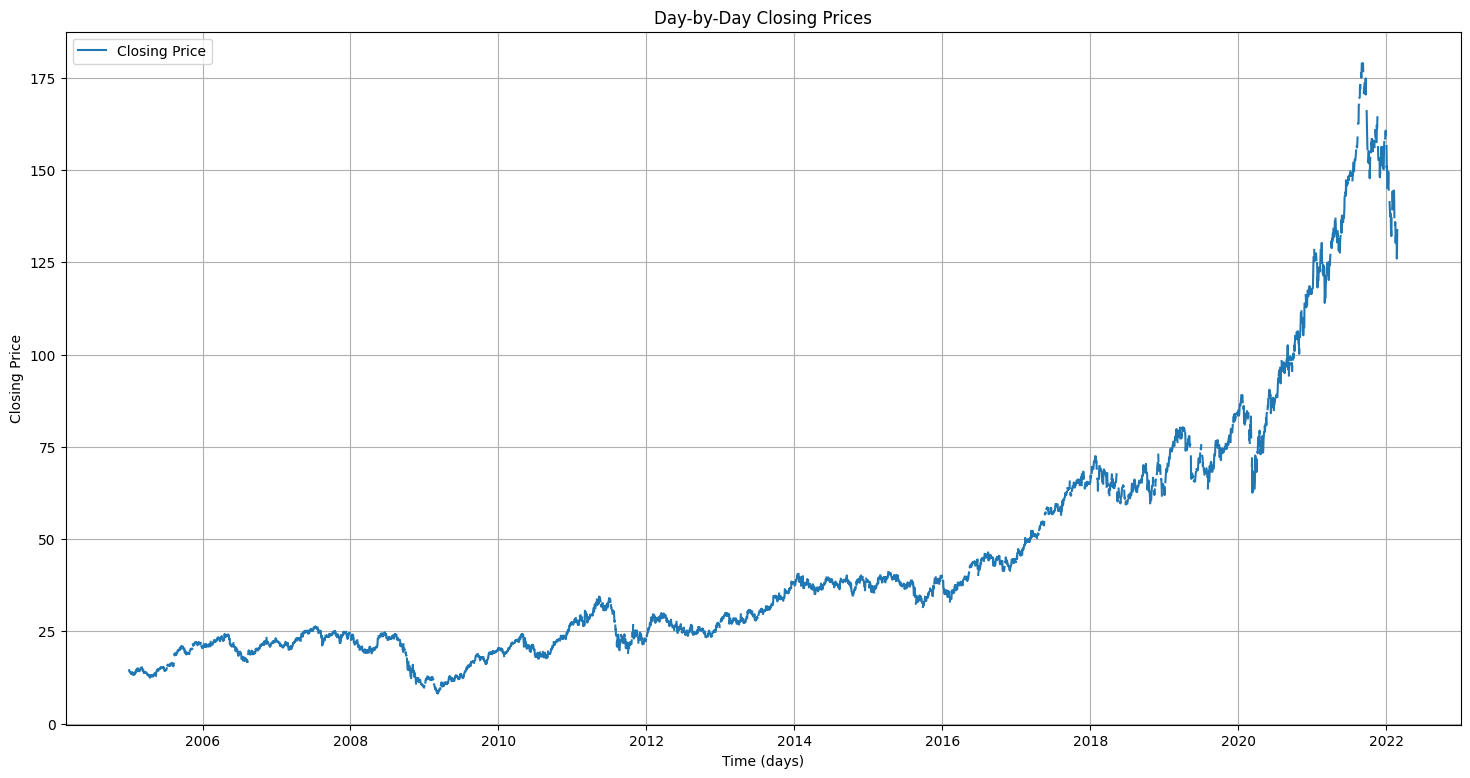

In [ ]:
file = 'A_1min.txt'
plot_day_by_day_closing_prices(file)

###Function for Candlestick plot

In [ ]:
def plot_candlestick_chart(file_path):
    # Read the text file into a DataFrame
    fileLoc = "/content/drive/MyDrive/EE782/Assign1/sp500_tickers_A-D_1min_1pppix/" + file
    df = pd.read_csv(fileLoc, header=None, names=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], parse_dates=['Date'])

    df['Year'] = df['Date'].dt.year

    year = df['Year'].unique()[1:2] # Extract the second year

    df = df[df['Year'].isin(year)]  # Training set with all years except the last year

    df.set_index('Date', inplace=True)

    # Taking aggregate across a day
    daily_data = df.resample('D').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

    # Plot candlestick chart with volume on a day-by-day basis
    mpf.plot(daily_data, type='candle', style='charles', volume=True, ylabel='Price',
             title='Candlestick Chart with Volume ', ylabel_lower='Volume', figsize=(18, 9), show_nontrading=True)

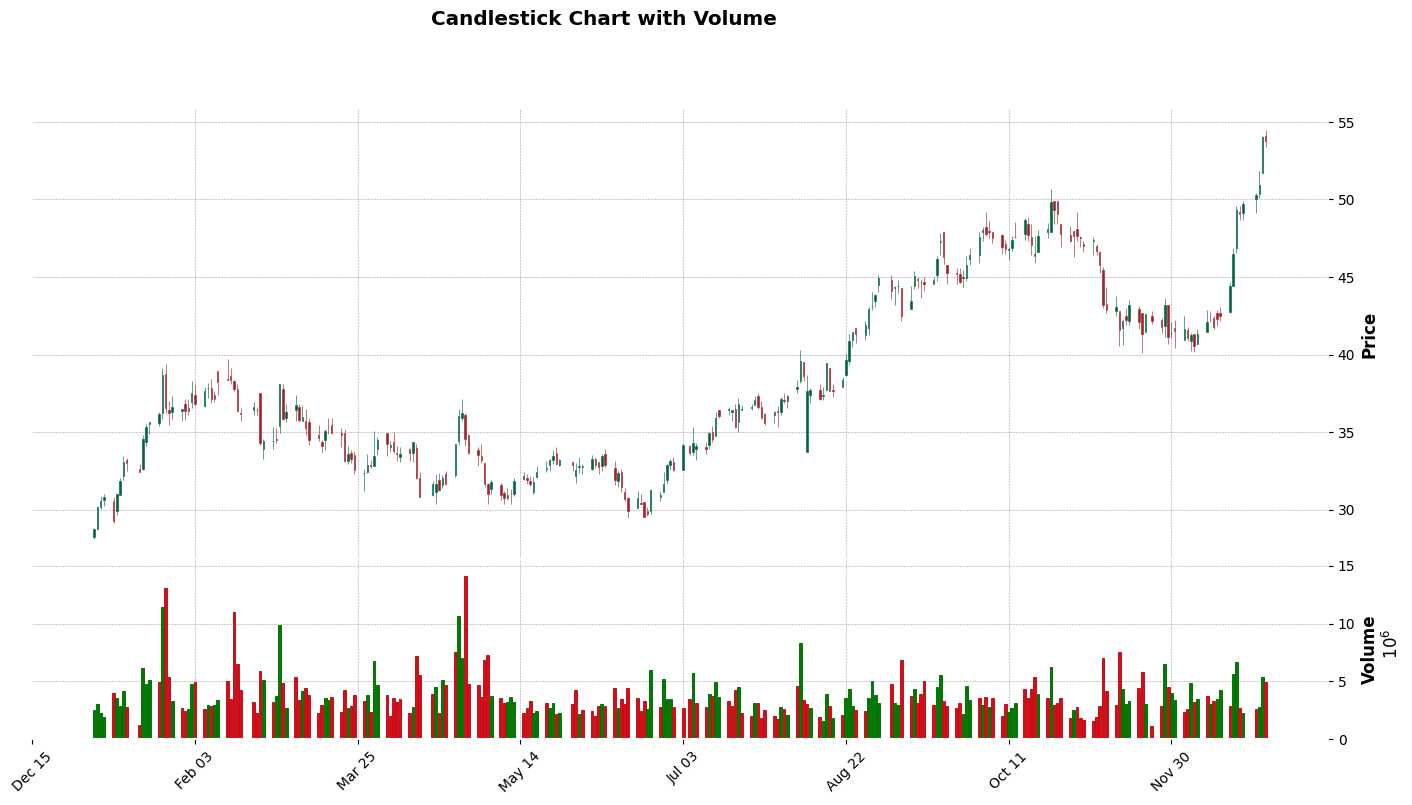

In [ ]:
file = 'AA_1min.txt'
plot_candlestick_chart(file)

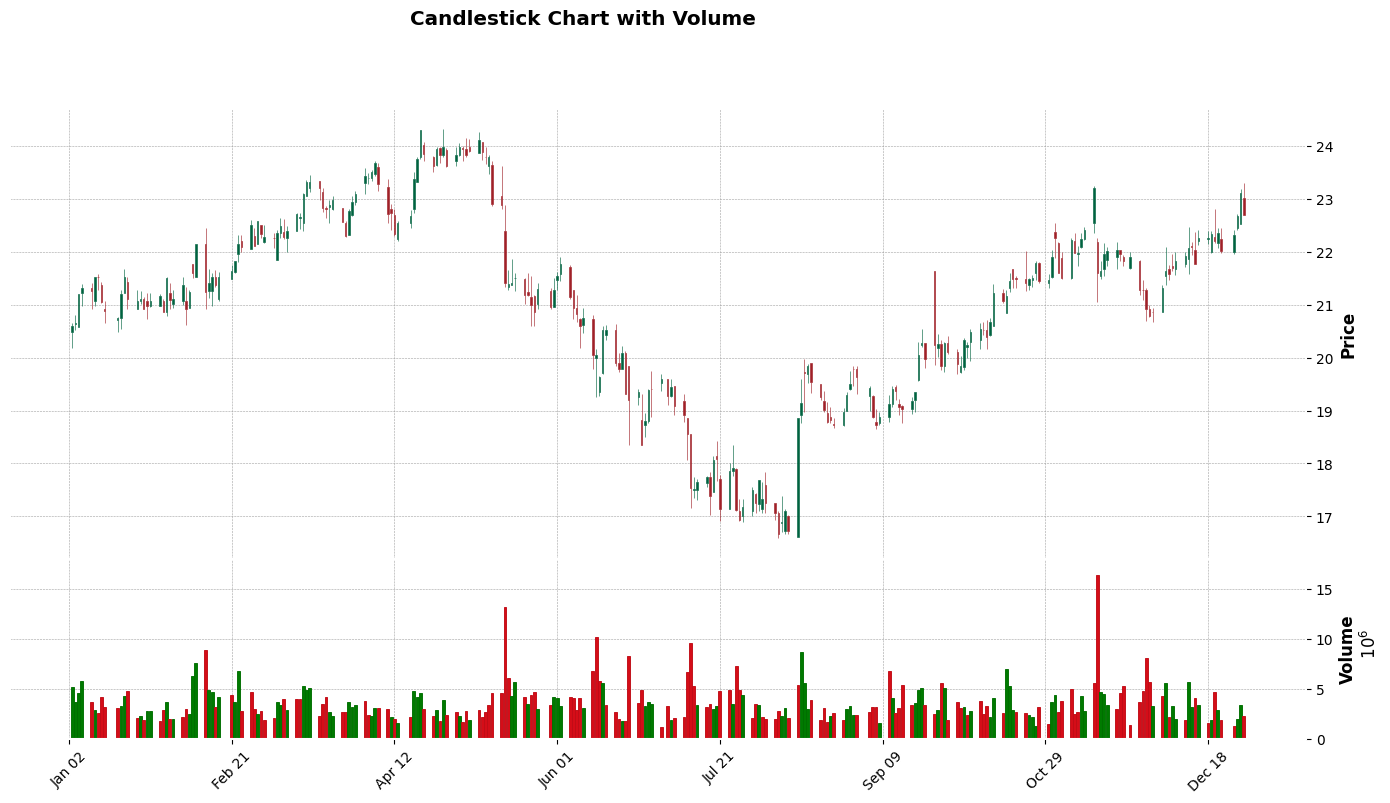

In [ ]:
file = 'A_1min.txt'
plot_candlestick_chart(file)

### (iv) The unexpected jumps and discontinuity observed in the plots are due to the fact that trading occurs during a certain time frame and there is no trading takes place during the weekends.

# Question 2

### Min-Max Scaling Function

In [ ]:
def min_max_scale_data(file):
    # Read the text file into a DataFrame
    fileLoc = "/content/drive/MyDrive/EE782/Assign1/sp500_tickers_A-D_1min_1pppix/" + file
    df = pd.read_csv(fileLoc, header=None, names=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], parse_dates=['Date'])

    # Select the columns to be scaled
    columns = ['Open', 'High', 'Low', 'Close', 'Volume']

    # Apply Min-Max scaling to the selected columns
    scaler = MinMaxScaler()
    df[columns] = scaler.fit_transform(df[columns])

    return df

### Z - Score Scaling Function

In [ ]:
def z_score_scale_data(file):
    # Read the text file into a DataFrame
    fileLoc = "/content/drive/MyDrive/EE782/Assign1/sp500_tickers_A-D_1min_1pppix/" + file
    df = pd.read_csv(fileLoc, header=None, names=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], parse_dates=['Date'])

    # Select the columns to be scaled
    columns = ['Open', 'High', 'Low', 'Close', 'Volume']

    # Apply Z-score standardization to the selected columns
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])

    return df


### Plotting Function

In [ ]:
import matplotlib.pyplot as plt

def plot_scaled_data(df):
    # Create a figure with a specified size
    plt.figure(figsize=(18, 3))

    # Plot the 'Open' column from the DataFrame
    plt.plot(df['Date'], df['Open'], label='Open', color='r')

    # Set the title for the plot
    plt.title('Scaled Data')

    # Set the label for the y-axis
    plt.ylabel('Open')

    # Display gridlines
    plt.grid(True)

    # Display the legend (label)
    plt.legend()

    # Show the plot
    plt.show()

    # Repeat the above steps for 'High', 'Low', 'Close', and 'Volume' columns

    # Create a figure for 'High'
    plt.figure(figsize=(18, 3))
    plt.plot(df['Date'], df['High'], label='High', color='b')
    plt.ylabel('High')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Create a figure for 'Low'
    plt.figure(figsize=(18, 3))
    plt.plot(df['Date'], df['Low'], label='Low', color='y')
    plt.ylabel('Low')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Create a figure for 'Close'
    plt.figure(figsize=(18, 3))
    plt.plot(df['Date'], df['Close'], label='Close', color='g')
    plt.ylabel('Close')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Create a figure for 'Volume'
    plt.figure(figsize=(18, 3))
    plt.plot(df['Date'], df['Volume'], label='Volume', color='orange')
    plt.ylabel('Volume')

    # Set the label for the x-axis
    plt.xlabel('Date')

    plt.grid(True)
    plt.legend()
    plt.show()

# Call the function with your DataFrame as an argument to plot the data


Min-Max Scaled Data:
                 Date      Open      High       Low     Close    Volume
0 2016-10-18 04:04:00  0.278291  0.278057  0.278713  0.278338  0.000005
1 2016-10-18 04:10:00  0.278939  0.278834  0.279361  0.279115  0.000022
2 2016-10-18 04:11:00  0.279068  0.278834  0.279361  0.278986  0.000038
3 2016-10-18 04:14:00  0.278809  0.278575  0.278713  0.278338  0.000038
4 2016-10-18 06:30:00  0.278291  0.278057  0.278713  0.278338  0.000027


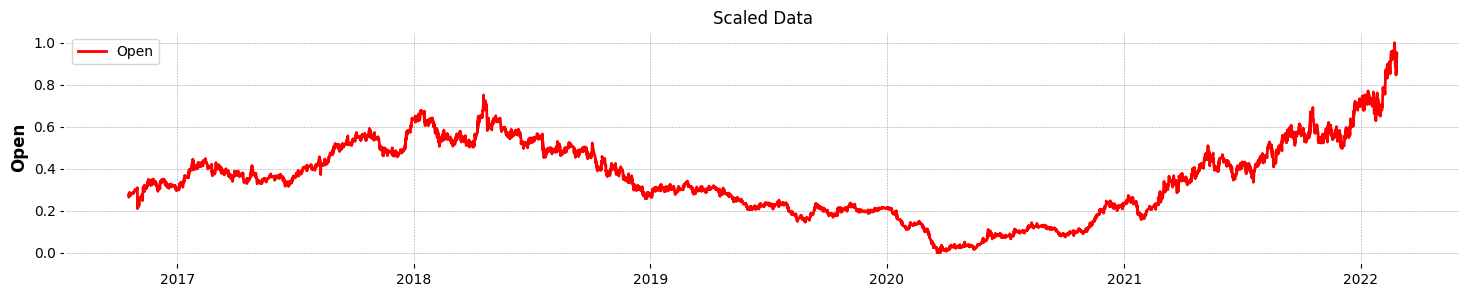

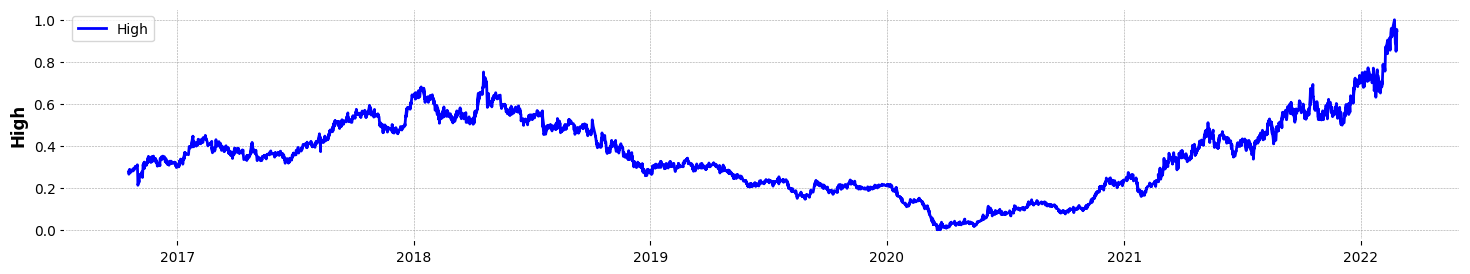

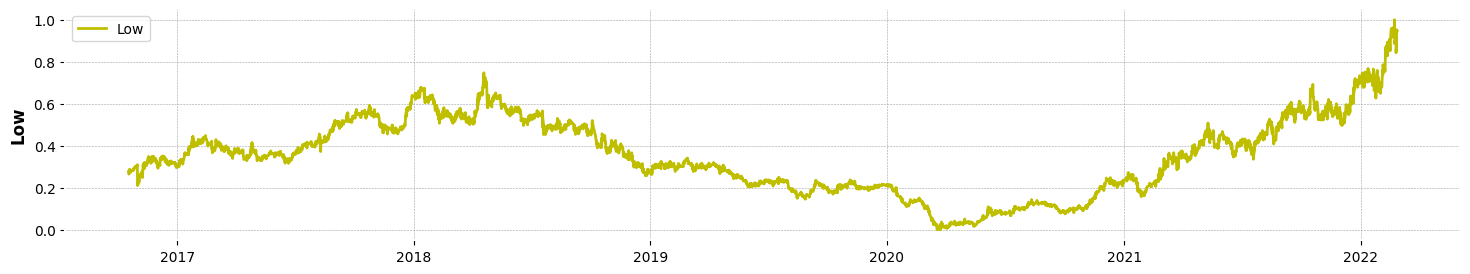

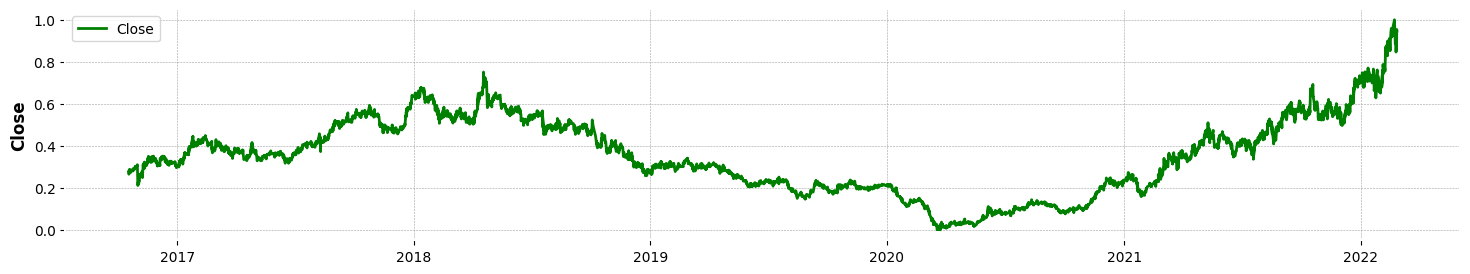

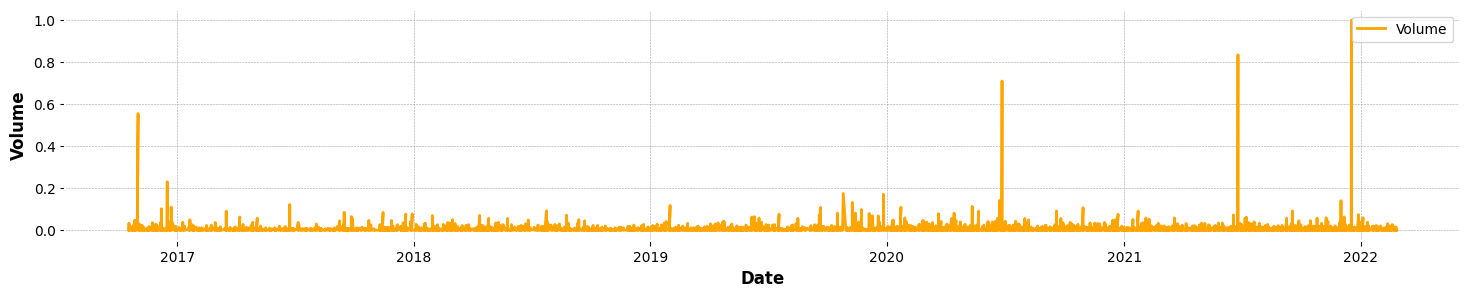


Z-Score Scaled Data:
                 Date      Open      High       Low     Close    Volume
0 2016-10-18 04:04:00 -0.421100 -0.422388 -0.419810 -0.421103 -0.234159
1 2016-10-18 04:10:00 -0.417605 -0.418199 -0.416312 -0.416911 -0.227931
2 2016-10-18 04:11:00 -0.416908 -0.418199 -0.416312 -0.417607 -0.221704
3 2016-10-18 04:14:00 -0.418308 -0.419598 -0.419810 -0.421103 -0.221704
4 2016-10-18 06:30:00 -0.421100 -0.422388 -0.419810 -0.421103 -0.225855


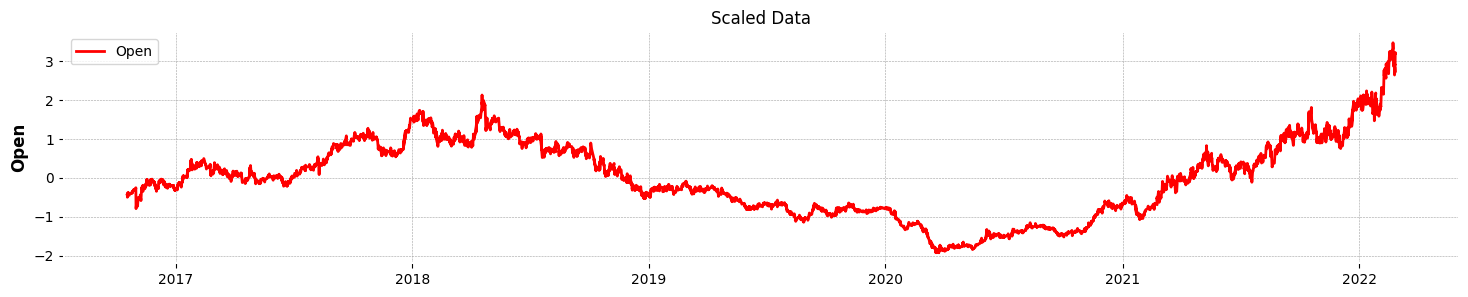

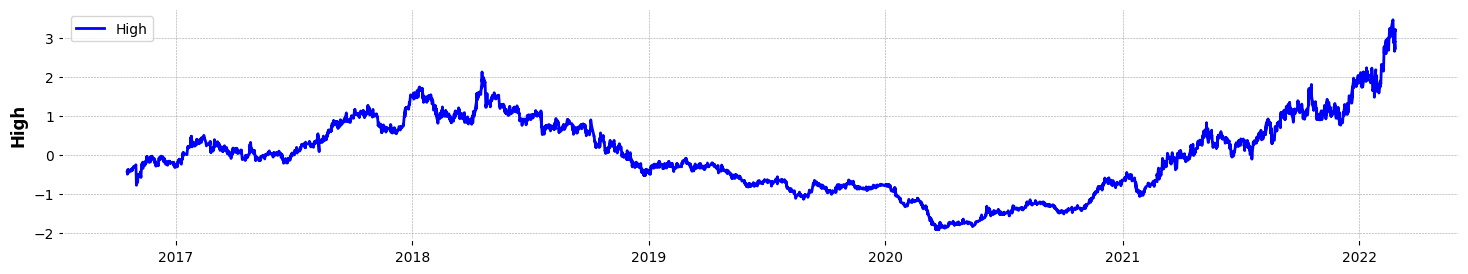

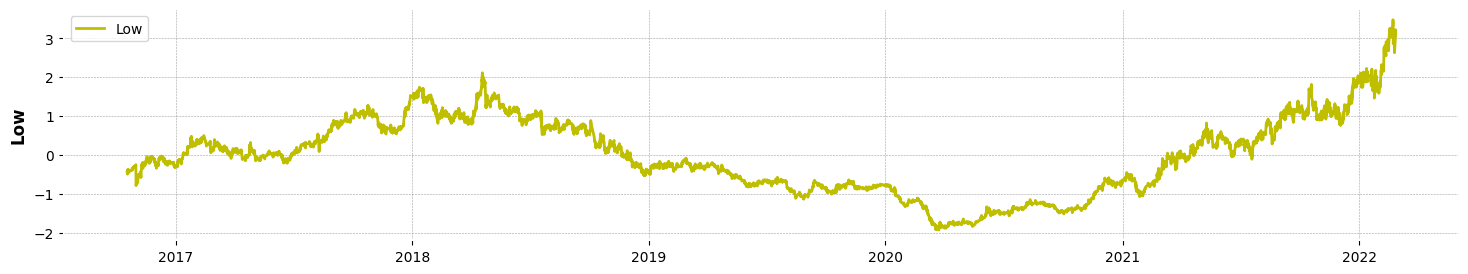

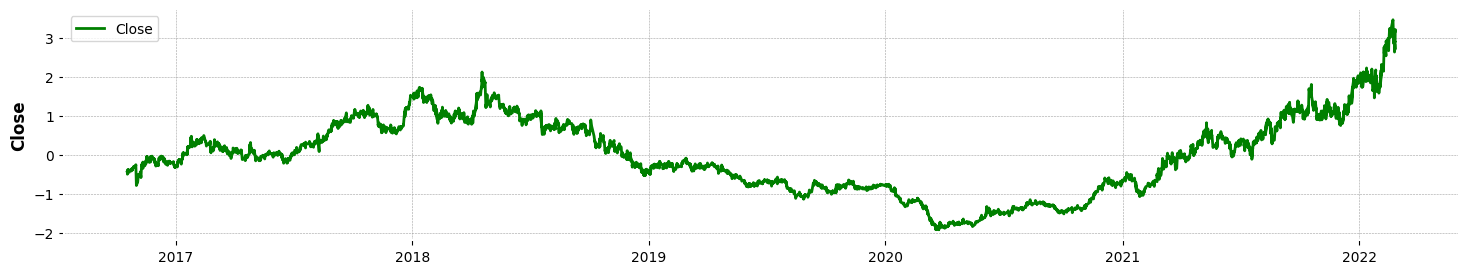

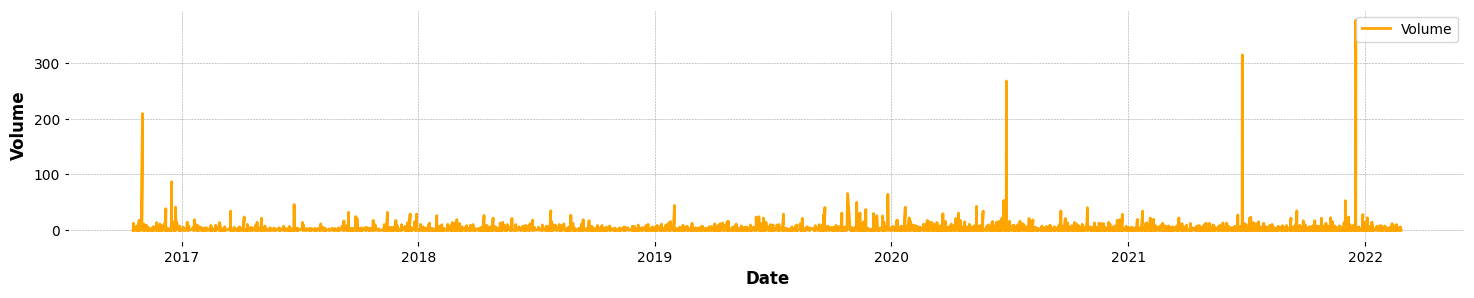

In [ ]:
file = 'AA_1min.txt'

# Min-Max scaling
min_max_scaled_data = min_max_scale_data(file)
print("Min-Max Scaled Data:")
print(min_max_scaled_data.head())
plot_scaled_data(min_max_scaled_data)

# Z-score standardization
z_score_scaled_data = z_score_scale_data(file)
print("\nZ-Score Scaled Data:")
print(z_score_scaled_data.head())
plot_scaled_data(z_score_scaled_data)

### From analysing the plot we can see there are few outliers with huge values in the volume data so if we use min max scaling most of values will be very close to 0 and will have very little impact in training.

### So we will be using the Standard scalar as the oulties will have very little effect in the mean and std because of the huge quantity of data.

# Question 3

### (a) Intra day swing trading
### (b) The commission we are using is 0.3% and buy-ask-spread as 0.02

# Question 4

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

### Key Hyperparameters

In [ ]:
input_size = 5
hidden_size = 64
num_layers = 3
output_size = 1
batch_size = 2500
lr = 0.001
num_epochs = 30
sequence_length = 25
minutes = 1

In [ ]:
import torch.nn as nn

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        # Initialize the LSTM model
        super(LSTM, self).__init__()

        # Set the size of the hidden state and the number of LSTM layers
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Create the LSTM layer with specified input size, hidden size, and number of layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        # Create a fully connected (linear) layer to produce the output
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Forward pass through the LSTM layer
        out, _ = self.lstm(x)

        # Return the output from the last time step (often used for sequence-to-one predictions)
        return self.fc(out[:, -1, :])


In [ ]:
# Create an instance of the LSTM model with specified parameters
model = LSTM(input_size=input_size, hidden_size=hidden_size, output_size=output_size, num_layers=num_layers)

# Define the loss function (Mean Squared Error in this case)
loss_fn = torch.nn.MSELoss()

# Create an optimizer (Adam optimizer) to update model parameters
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

# Print the model architecture for inspection
print(model)


LSTM(
  (lstm): LSTM(5, 64, num_layers=3, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)


# Question 5

### The commented code is for the dataloader code using the DataLoader present in Pytorch

In [ ]:
# def DataReader(file):
#   fileLoc = "/content/drive/MyDrive/EE782/Assign1/sp500_tickers_A-D_1min_1pppix/" + file
#   df = pd.read_csv(fileLoc, sep=',', header=None, index_col=0, parse_dates=True)
#   df.rename(columns={1: 'Open', 2: 'High', 3: 'Low', 4: 'Close', 5: 'Volume'}, inplace=True)
#   df.index.name = 'Date'
#   df.reset_index(inplace=True)
#   df = df.astype({'Open': float, 'High': float, 'Low': float, 'Close': float, 'Volume': int}) #typecasting data as float and int for computation

#   df['Year'] = df['Date'].dt.year


#   train = df['Year'].unique()[:-2]
#   test = df['Year'].unique()[-2:] # Splitting Test as  last 2 years

#   train_df = df[df['Year'].isin(train)]  # Training set with all years except the last year
#   test_df = df[df['Year'].isin(test)]   # Testing set with last 2 year

#   train_df = train_df[['Open', 'High', 'Low', 'Close', 'Volume']]
#   test_df = test_df[['Open', 'High', 'Low', 'Close', 'Volume']]

#   train_mean = train_df.mean()
#   train_std = train_df.std()
#   train_df = (train_df - train_mean) / train_std
#   test_df = (test_df - train_mean) / train_std


#   return train_df, test_df

In [ ]:
# class StockDataset(Dataset):
#     def __init__(self, df, sequence_length=50):
#         self.sequence_length = sequence_length
#         self.features = df[['Open', 'High', 'Low', 'Close', 'Volume']].values
#         self.targets = df[['Close']].values

#     def __len__(self):
#         return len(self.features) - self.sequence_length + 1

#     def __getitem__(self, idx):
#         if torch.is_tensor(idx):
#             idx = idx.tolist()

#         end_idx = idx + self.sequence_length
#         sample = {
#             'features': torch.tensor(self.features[idx:end_idx], dtype=torch.float32),
#             'target': torch.tensor(self.targets[end_idx], dtype=torch.float32)
#         }

#         return sample


In [ ]:
# def DataGenerator(file, sequence_length = 10, batch_size = 10, shuffle = True):
#   train, val, test = DataReader(file)
#   train_df = StockDataset(train, sequence_length)
#   train_dataloader = DataLoader(train_df, batch_size=batch_size, shuffle=shuffle)

#   test_df = StockDataset(test, sequence_length)
#   test_dataloader = DataLoader(test_df, batch_size=1, shuffle=False)

#   return train_dataloader, val_dataloader, test_dataloader



### Custom dataloader made from scratch

In [ ]:
import pandas as pd
import numpy as np
import torch

def DataLoader(file, sequence_length=25, batch_size=1000, minutes=1, shuffle=True):
    # Function to read data from the drive
    def DataReader(file):
        # Construct the full file path
        fileLoc = "/content/drive/MyDrive/EE782/Assign1/sp500_tickers_A-D_1min_1pppix/" + file

        # Read the CSV file into a DataFrame
        df = pd.read_csv(fileLoc, sep=',', header=None, index_col=0, parse_dates=True)

        # Rename columns for clarity
        df.rename(columns={1: 'Open', 2: 'High', 3: 'Low', 4: 'Close', 5: 'Volume'}, inplace=True)

        # Set the index name and reset the index
        df.index.name = 'Date'
        df.reset_index(inplace=True)

        # Typecast data to float and int for computation
        df = df.astype({'Open': float, 'High': float, 'Low': float, 'Close': float, 'Volume': int})

        # Extract the year from the 'Date' column
        df['Year'] = df['Date'].dt.year

        # Split data into training and testing sets based on the year
        train = df['Year'].unique()[:-2]
        test = df['Year'].unique()[-2:]  # Splitting Test as the last 2 years

        train_df = df[df['Year'].isin(train)]  # Training set with all years except the last year
        test_df = df[df['Year'].isin(test)]    # Testing set with the last 2 years

        # Select relevant columns for training and testing
        train_df = train_df[['Open', 'High', 'Low', 'Close', 'Volume']]
        test_df = test_df[['Open', 'High', 'Low', 'Close', 'Volume']]

        # Normalize data by calculating mean and standard deviation from training set
        train_mean = train_df.mean()
        train_std = train_df.std()
        train_df = (train_df - train_mean) / train_std
        test_df = (test_df - train_mean) / train_std

        return train_df, test_df
    # function arrange the data into the input format for LSTM
    def batch_generator(df, sequence_length, batch_size, minutes, shuffle):
        features = df[['Open', 'High', 'Low', 'Close', 'Volume']].values
        targets = df[['Close']].values
        # Shuffle if it is true
        if shuffle:
            indices = np.arange(len(df) - sequence_length - minutes + 1)
            np.random.shuffle(indices)
        else:
            indices = np.arange(len(df) - sequence_length - minutes + 1)
        # setting up batches
        for start_idx in range(0, len(indices), batch_size):
            end_idx = min(start_idx + batch_size, len(indices))
            batch_indices = indices[start_idx:end_idx]
            batch_features = [features[i:i + sequence_length] for i in batch_indices]
            batch_targets = [targets[i + sequence_length - 1 + minutes] for i in batch_indices]

            yield torch.tensor(batch_features, dtype=torch.float32), torch.tensor(batch_targets, dtype=torch.float32)

    # Call DataReader to load training and testing data
    train_df, test_df = DataReader(file)

    # Generate batches of training and testing data
    train_batches = list(batch_generator(train_df, sequence_length, batch_size, minutes, shuffle))
    test_batches = list(batch_generator(test_df, sequence_length, 1, minutes, False))

    return train_batches, test_batches


# Question 6

In [ ]:
# Create an instance of the LSTM model with specified parameters
model = LSTM(input_size, hidden_size, num_layers, output_size)

# Define the loss function (Mean Squared Error in this case)
criterion = nn.MSELoss()

# Create an optimizer (Adam optimizer) to update model parameters with a specified learning rate
optimizer = optim.Adam(model.parameters(), lr=lr)


In [ ]:
file = 'AA_1min.txt'
# loading training and testing data
train_batches, test_batches = DataLoader(file, sequence_length = sequence_length, batch_size = batch_size, minutes = minutes)

<ipython-input-25-41db73b54624>:62: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  yield torch.tensor(batch_features, dtype=torch.float32), torch.tensor(batch_targets, dtype=torch.float32)


In [ ]:
# Loop through a specified number of training epochs
for epoch in range(num_epochs):
    train_loss = 0.0  # Initialize the training loss for this epoch

    # Training loop: Iterate through batches of training data
    for batch_features, batch_targets in train_batches:
        optimizer.zero_grad()  # Clear the gradients from previous iterations

        outputs = model(batch_features)  # Forward pass: Get model predictions
        loss = criterion(outputs, batch_targets)  # Calculate the loss between predictions and actual targets
        loss.backward()  # Backpropagate the gradients
        optimizer.step()  # Update model parameters using the optimizer

        # Accumulate the loss for this batch
        train_loss += loss.item()

    # Calculate the average training loss for this epoch
    train_loss /= (len(train_batches))

    # Print the training loss for this epoch
    print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.6f}')


Epoch 1/30, Train Loss: 0.076290
Epoch 2/30, Train Loss: 0.000094
Epoch 3/30, Train Loss: 0.000066
Epoch 4/30, Train Loss: 0.000061
Epoch 5/30, Train Loss: 0.000058
Epoch 6/30, Train Loss: 0.000057
Epoch 7/30, Train Loss: 0.000056
Epoch 8/30, Train Loss: 0.000056
Epoch 9/30, Train Loss: 0.000055
Epoch 10/30, Train Loss: 0.000055
Epoch 11/30, Train Loss: 0.000055
Epoch 12/30, Train Loss: 0.000057
Epoch 13/30, Train Loss: 0.000059
Epoch 14/30, Train Loss: 0.000060
Epoch 15/30, Train Loss: 0.000055
Epoch 16/30, Train Loss: 0.000061
Epoch 17/30, Train Loss: 0.000064
Epoch 18/30, Train Loss: 0.000064
Epoch 19/30, Train Loss: 0.000065
Epoch 20/30, Train Loss: 0.000066
Epoch 21/30, Train Loss: 0.000064
Epoch 22/30, Train Loss: 0.000067
Epoch 23/30, Train Loss: 0.000066
Epoch 24/30, Train Loss: 0.000066
Epoch 25/30, Train Loss: 0.000066
Epoch 26/30, Train Loss: 0.000065
Epoch 27/30, Train Loss: 0.000065
Epoch 28/30, Train Loss: 0.000063
Epoch 29/30, Train Loss: 0.000063
Epoch 30/30, Train Loss

In [ ]:
# for epoch in range(num_epochs):
#     train_loss = 0.0

#     for i, data in enumerate(train_dataloader):
#         features, targets = data['features'], data['target']
#         features = features.float()
#         targets = targets.float()

#         optimizer.zero_grad()

#         outputs = model(features)
#         loss = criterion(outputs, targets)
#         loss.backward()
#         optimizer.step()

#         train_loss += loss.item() * features.size(0)

#     train_loss /= len(train_dataloader.dataset)
#     test_loss = 0.0

#     with torch.no_grad():
#         for i, data in enumerate(val_dataloader):
#             features, targets = data['features'], data['target']
#             features = features.float()
#             targets = targets.float()

#             outputs = model(features)
#             loss = criterion(outputs, targets)

#             test_loss += loss.item() * features.size(0)

#     test_loss /= len(val_dataloader.dataset)

#     print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.6f}, Val Loss: {test_loss:.6f}')

In [ ]:
train_batches, _ = DataLoader(file, sequence_length = sequence_length, batch_size = batch_size, minutes = minutes, shuffle = False)

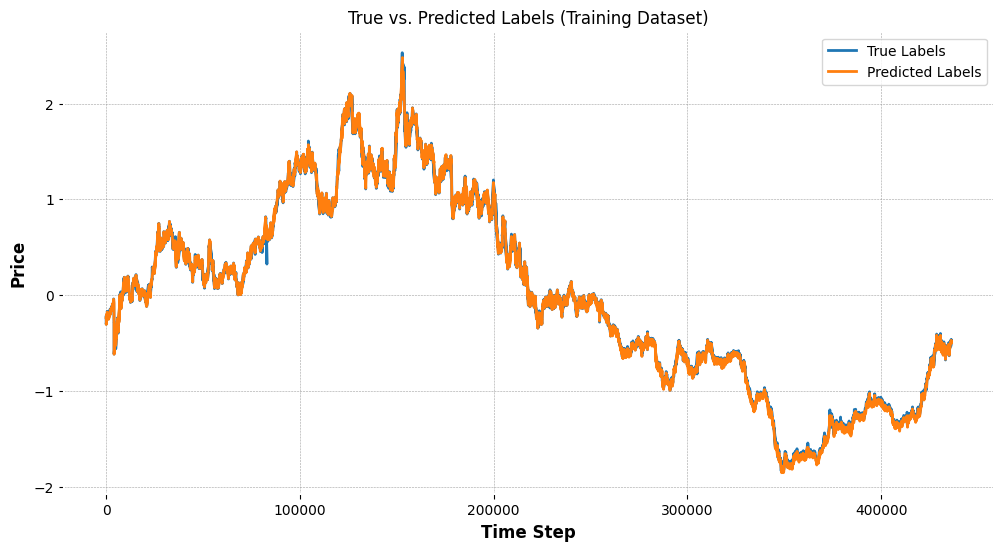

In [ ]:
# Initialize variables to store the total loss, predictions, and original targets
total_loss = 0.0
predictions = []
original = []

# Loop through the training batches to make predictions
for batch_features, batch_targets in train_batches:
    with torch.no_grad():
        outputs = model(batch_features)  # Forward pass to get predictions without gradient computation

    # Extend the 'predictions' and 'original' lists with the predicted and actual values
    predictions.extend(outputs.numpy())
    original.extend(batch_targets.numpy())

# Create a plot to visualize true labels and predicted labels
plt.figure(figsize=(12, 6))
plt.plot(original, label='True Labels')  # Plot the true (actual) labels
plt.plot(predictions, label='Predicted Labels')  # Plot the predicted labels
plt.xlabel('Time Step')  # Label for the x-axis
plt.ylabel('Price')  # Label for the y-axis
plt.title('True vs. Predicted Labels (Training Dataset)')  # Title of the plot
plt.legend()  # Display the legend indicating which line corresponds to which label
plt.grid(True)  # Display gridlines in the plot
plt.show()  # Show the plot


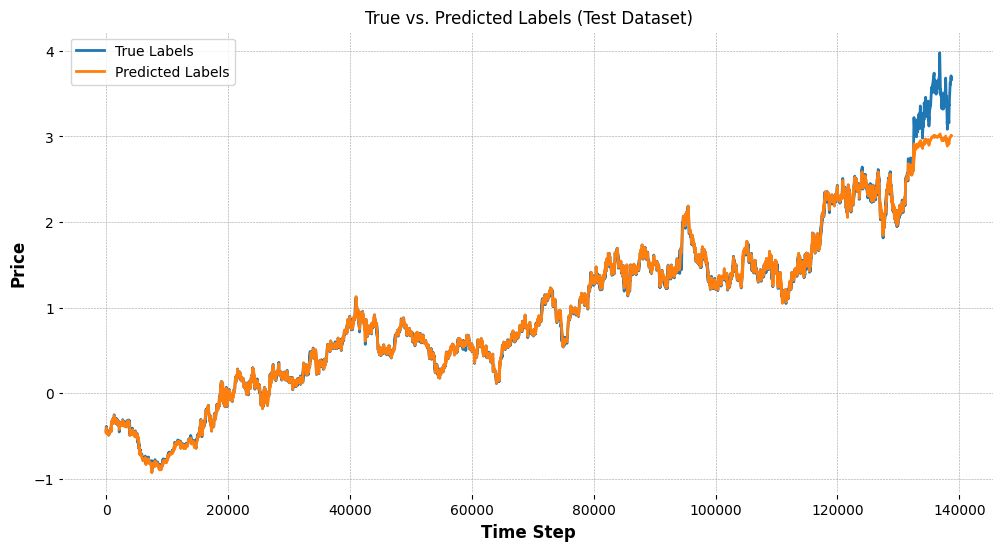

In [ ]:
# Initialize variables to store the total loss, predictions, and original targets
total_loss = 0.0
predictions = []
original = []

# Loop through the test batches to make predictions
for batch_features, batch_targets in test_batches:
    with torch.no_grad():
        outputs = model(batch_features)  # Forward pass to get predictions without gradient computation

    # Extend the 'predictions' and 'original' lists with the predicted and actual values
    predictions.extend(outputs.numpy())
    original.extend(batch_targets.numpy())

# Create a plot to visualize true labels and predicted labels for the test dataset
plt.figure(figsize=(12, 6))
plt.plot(original, label='True Labels')  # Plot the true (actual) labels
plt.plot(predictions, label='Predicted Labels')  # Plot the predicted labels
plt.xlabel('Time Step')  # Label for the x-axis
plt.ylabel('Price')  # Label for the y-axis
plt.title('True vs. Predicted Labels (Test Dataset)')  # Title of the plot
plt.legend()  # Display the legend indicating which line corresponds to which label
plt.grid(True)  # Display gridlines in the plot
plt.show()  # Show the plot


In [ ]:
torch.save(model, "/content/drive/MyDrive/EE782/Assign1/model_large.h5")# saving the model

In [ ]:
model1 = torch.load("/content/drive/MyDrive/EE782/Assign1/model_large.h5") # reloading the model


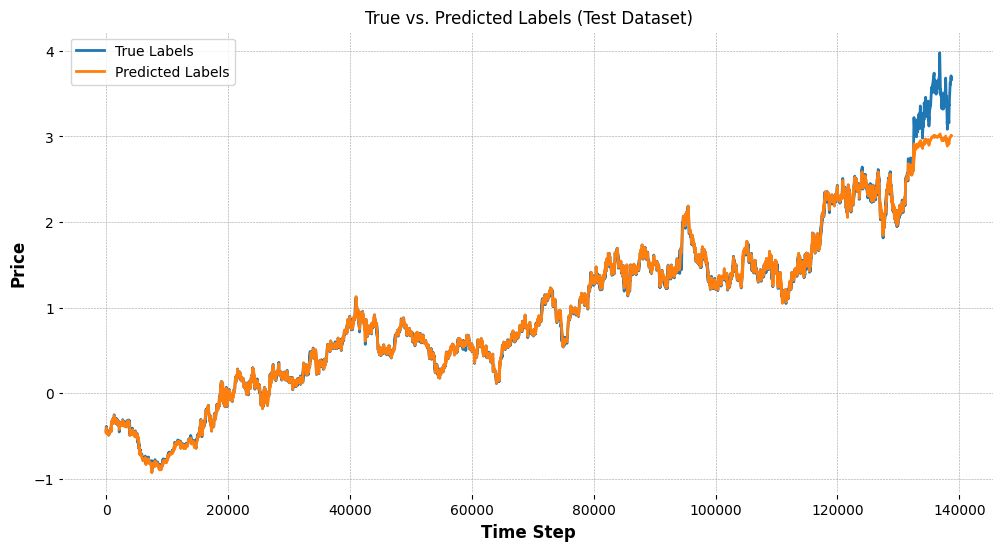

In [ ]:
# Initialize variables to store the total loss, predictions, and original targets
total_loss = 0.0
predictions = []
original = []

# Loop through the test batches to make predictions
for batch_features, batch_targets in test_batches:
    with torch.no_grad():
        outputs = model(batch_features)  # Forward pass to get predictions without gradient computation

    # Extend the 'predictions' and 'original' lists with the predicted and actual values
    predictions.extend(outputs.numpy())
    original.extend(batch_targets.numpy())

# Create a plot to visualize true labels and predicted labels for the test dataset
plt.figure(figsize=(12, 6))
plt.plot(original, label='True Labels')  # Plot the true (actual) labels
plt.plot(predictions, label='Predicted Labels')  # Plot the predicted labels
plt.xlabel('Time Step')  # Label for the x-axis
plt.ylabel('Price')  # Label for the y-axis
plt.title('True vs. Predicted Labels (Test Dataset)')  # Title of the plot
plt.legend()  # Display the legend indicating which line corresponds to which label
plt.grid(True)  # Display gridlines in the plot
plt.show()  # Show the plot


## Question 7

In [ ]:
def DataReader(file):
    # Construct the full file path based on the provided 'file' parameter
    fileLoc = "/content/drive/MyDrive/EE782/Assign1/sp500_tickers_A-D_1min_1pppix/" + file

    # Read the CSV file into a DataFrame, specifying delimiter (',') and no header
    df = pd.read_csv(fileLoc, sep=',', header=None, index_col=0, parse_dates=True)

    # Rename columns for clarity
    df.rename(columns={1: 'Open', 2: 'High', 3: 'Low', 4: 'Close', 5: 'Volume'}, inplace=True)

    # Set the index name to 'Date' and reset the index
    df.index.name = 'Date'
    df.reset_index(inplace=True)

    # Typecast data to float and int for numerical computations
    df = df.astype({'Open': float, 'High': float, 'Low': float, 'Close': float, 'Volume': int})

    # Extract the year from the 'Date' column
    df['Year'] = df['Date'].dt.year

    # Identify unique years for training and testing split
    train = df['Year'].unique()[:-2]  # Training years (all years except the last two)
    test = df['Year'].unique()[-2:]   # Testing years (the last two years)

    # Create training and testing DataFrames based on the identified years
    train_df = df[df['Year'].isin(train)]  # Training set with all years except the last year
    test_df = df[df['Year'].isin(test)]    # Testing set with the last two years

    # Extract the 'Close' column for the training set
    train_df = train_df['Close']

    # Calculate the mean and standard deviation of the 'Close' prices in the training set
    train_mean = train_df.mean()
    train_std = train_df.std()

    # Return the computed mean and standard deviation
    return train_mean, train_std


In [ ]:
file = 'AA_1min.txt'
mean, std = DataReader(file)# getting the mean and std of training sample

In [ ]:
# Trading parameters
initial_balance = 10000  # Starting balance
balance = initial_balance
shares_held = 0
commission = 0.0003  # 0.03% commission on each trade
bid_ask_spread = 0.02 # Bid-ask spread
start = 0
c = 0
end = 0

# Lists to store trading decisions and profits
trading_decisions = []
profits = []

# Trading logic
for inputs, target in test_batches:
    # Make a prediction using the LSTM model
    if c == 0:
      c = c + 1
      start = target.item()

    prediction = model1(inputs)
    predicted_price_change = (prediction.item() - inputs[:,-1,-2])*std

    # Calculate the moving average (SMA)
    sma_window = 5  # Adjust this window size as needed
    if len(profits) >= sma_window:
        sma = sum(profits[-sma_window:]) / sma_window
    else:
        sma = 0
    # Trading decision logic
    if predicted_price_change > sma:
        # Buy decision
        if balance > 0:
            current_price = inputs[:,-1,-2]*std + mean
            shares_to_buy = balance //( (1 + commission) * (current_price + bid_ask_spread))
            shares_held += shares_to_buy
            if shares_to_buy == 0:
              trading_decisions.append("Hold")
            else:
              balance -= shares_to_buy * current_price * (1 + commission)
              trading_decisions.append("Buy")
    elif predicted_price_change < sma:
        # Sell decision
        if shares_held > 0:

            current_price = inputs[:,-1,-2]*std + mean
            balance += shares_held * current_price * (1 - commission)
            profits.append((balance - initial_balance) / initial_balance)
            shares_held = 0
            trading_decisions.append("Sell")
    else:
        # Hold decision
        trading_decisions.append("Hold")
end = target.item()
# Calculate the final profitability
final_balance = balance + shares_held * current_price
final_profitability = (final_balance - initial_balance) / initial_balance
print("Final Profitability:", final_profitability)
print("Trading Decisions:", trading_decisions)


Final Profitability: tensor([0.7497])
Trading Decisions: ['Buy', 'Hold', 'Hold', 'Hold', 'Sell', 'Buy', 'Hold', 'Hold', 'Sell', 'Buy', 'Sell', 'Buy', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Sell', 'Buy', 'Hold', 'Hold', 'Hold', 'Hold', 'Sell', 'Buy', 'Sell', 'Buy', 'Sell', 'Buy', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Sell', 'Buy', 'Sell', 'Buy', 'Sell', 'Buy', 'Hold', 'Sell', 'Buy', 'Sell', 'Buy', 'Hold', 'Sell', 'Buy', 'Sell', 'Buy', 'Sell', 'Buy', 'Sell', 'Buy', 'Buy', 'Hold', 'Sell', 'Buy', 'Hold', 'Hold', 'Sell', 'Buy', 'Sell', 'Buy', 'Buy', 'Hold', 'Sell', 'Buy', 'Sell', 'Buy', 'Hold', 'Hold', 'Hold', 'Sell', 'Buy', 'Sell', 'Buy', 'Hold', 'Hold', 'Sell', 'Buy', 'Buy', 'Hold', 'Hold', 'Hold', 'Sell', 'Buy', 'Sell', 'Buy', 'Buy', 'Sell', 'Buy', 'Hold', 'Hold', 'Hold', 'Hold', 'Sell', 'Buy', 'Sell', 'Buy', 'Sell', 'Buy', 'Buy', 'Hold', 'Sell', 'Buy', 'Sell', 'Buy', 'Sell', 'Buy', 'Hold', 'Sell', 'Buy', 'Buy', 'Hold', 'Sell', 'Buy', 'Sell', 'Buy', 'Buy', 'Hold', 'Sell', 'Buy', 'Ho

In [ ]:
long_hold = ((end*std+mean) - (start*std+mean))/(start*std+mean)
print("Profitability from long hold:", long_hold)

Profitability from long hold: 2.293618482717232


In [ ]:
final_balance

tensor([17496.9941])

## Question 8

### (a) Yes, the price prediction error increase as we go further ahead in time.

### (b) Yes, we can profitabily trade after considering the commission and bid-ask-spread.

### (c) The profitability is less in this case as we can see from the plot the stock price almost 230% times for long term holding while only 75% in our case.

## References:

 ### LSTM code : https://saturncloud.io/blog/multivariate-input-lstm-in-pytorch-a-guide-for-data-scientists/

 ### Used ChatGPT for help with plotting and debugging.